<a href="https://colab.research.google.com/github/KholidMaulidi/PCVK_Ganjil_2023/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Nama: Kholid Maulidi
##Kelas: 3C
##No Absen: 13
##NIM: 2141720139

In [49]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


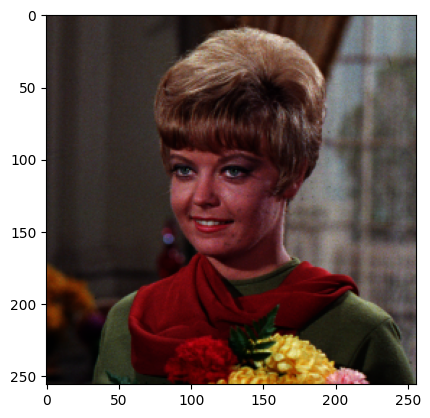

In [50]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
img = cv.imread('/content/drive/MyDrive/Images/female.tiff')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)

1. Membuat Gamma Correction

Gamma Correction Pada Citra
Masukkan Nilai Gamma : 3


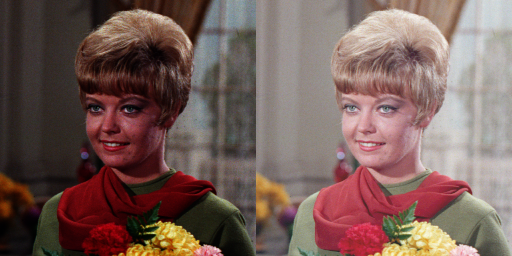

In [52]:
print('Gamma Correction Pada Citra')
print('===========================')
try :
  gamma = int(input('Masukkan Nilai Gamma : '))
except ValueError:
  print('Error, not a number');

original = cv.imread('/content/drive/MyDrive/Images/female.tiff')
gamma_image = np.zeros(original.shape, original.dtype)

#Melakukan Akses Per Piksel dengan 3 Looping

for x in range(original.shape[0]):
  for y in range(original.shape[1]):
    for z in range(original.shape[2]):
     gamma_image[x,y,z] = np.clip(255 * pow(original[x,y,z]/255,(1/gamma)), 0, 255)

final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)

2. Membuat Simulasi Image Depth

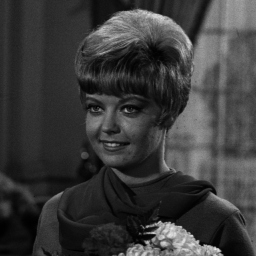

In [53]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
img = cv.imread('/content/drive/MyDrive/Images/female.tiff', cv.IMREAD_GRAYSCALE)
original = cv.cvtColor(img,cv.COLOR_BGR2RGB) # konversi channel BGR -> RGB
cv2_imshow(img)

 Bit Depth Pada Citra 


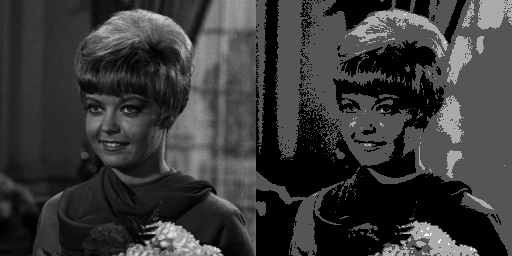

In [54]:
print(' Bit Depth Pada Citra ')
print('======================')

bit_depth=2
level = 255 / (pow(2,bit_depth)-1)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
     gamma_image[y,x,c] = np.clip(round(original[y,x,c] / level) * level, 0, 255);
depth_image = np.zeros(original.shape, original.dtype)
final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)

##TUGAS

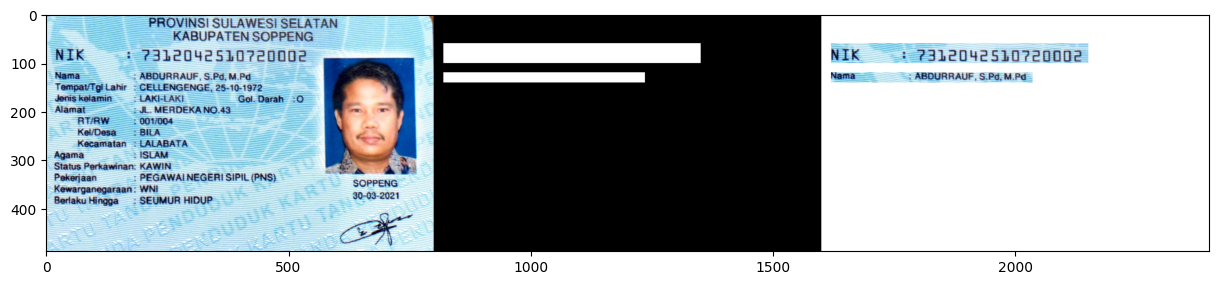

In [65]:
img_ktp = cv.imread('/content/drive/MyDrive/Images/KTP.jpeg')
img_ktp = cv.cvtColor(img_ktp, cv.COLOR_BGR2RGB)

img_mask = np.zeros(img_ktp.shape, dtype=np.uint8)

mask1 = cv.rectangle(img_mask, pt1=(20,60), pt2=(550,100), color=(255,255,255), thickness=cv.FILLED)

masking2 = cv.rectangle(img_mask, pt1=(20,120), pt2=(435,140), color=(255,255,255), thickness=cv.FILLED)

original = ~ img_ktp

result_AND = ~ (img_mask & original)

final_frame = cv.hconcat((img_ktp, img_mask, result_AND))
plt.figure(figsize=(15, 5))
plt.imshow(final_frame)
plt.show()